# MORALS Media Neuroscience Lab Data Sorting and Analysis 

##### Sorting participants into fMRI approved categories and moral foundations

- for COMM 160DS, UCSB Spring Quarter 2023
- by Kristina Dyrvik

______________________

### Introduction:
This project is using python and pandas to clean and analyze data gathered from the UCSB Media Neuroscience Lab's (https://www.medianeuroscience.org/) MORALs Study 1. The study analyzes how moral foundations (family, group, reciprocity, fairness, deference, and property) can influence whether individuals engage in hate speech or larger amounts of social media usage. The data used in this analysis aims to look at the proportion and amount of invididuals that fall into certain moral foundations. The study also uses fMRI eye-image tracking, so this project also cleans the data to sort those that would be eligible for Study 2 (fMRI). 

### Purpose of the study:
- Replicate disassociable moral networks associated with moral vignettes based on the old MFT
- Examine moral networks across different modalities based on the old MFT
- Identify disassociable moral networks associated with moral vignettes that correspond to the recent theory (MFQ-2 and MAC)

### Research Questions: 
- How do participants in Study 1 fall in terms of moral foundations? 
- What are the proportion and percentages of those moral foundations?
- How many participants are eligible for Study 2 (fMRI)

### Dataset Description:
This dataset is the recorded data from the Media NeuroScience Lab's MORAL's Study 1. The data has been anonymized prior to being listed here. The data includes participants responses to questions that will determine their moral frameworks.

_______

### Pre-processing:

In [1]:
import pandas as pd
import numpy as np 
!pip install nltk
!pip install networkx
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
!pip install openpyxl
import math
import scipy.stats as stats

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached regex-2023.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (770 kB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [2]:
# read data
df_csv = pd.read_csv('fMRI-RadicalMoralContent_May 19, 2023_23.04.csv')

# dropped columns with participant information and data not pertinent to moral foundations
# dropped preview rows
df = df_csv.loc[9:436, df_csv.columns.drop(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)',
                                          'RecordedDate', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
                                          'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'reward', 'email',
                                         'Age_1', 'Gender', 'English', 'Race', 'Education', 'vote', 'registered', 'Phone', 'ResponseId', 'Sex', 'Consent2',
                                            'MFQ2-1_1', 'MFQ2-1_2', 'MFQ2-1_3','MFQ2-1_4', 'MFQ2-1_5', 'MFQ2-1_6', 'MFQ2-1_7', 'MFQ2-1_8', 
                                            'MFQ2-1_9', 'MFQ2-1_10','MFQ2-2_1', 'MFQ2-2_2', 'MFQ2-2_3', 'MFQ2-2_4', 'MFQ2-2_5', 'MFQ2-2_6', 
                                            'MFQ2-2_7','MFQ2-2_8', 'MFQ2-2_9', 'MFQ2-2_10', 'MFQ2-3_1', 'MFQ2-3_2', 'MFQ2-3_3', 'MFQ2-3_4',
                                            'MFQ2-3_5', 'MFQ2-3_6', 'MFQ2-3_7', 'MFQ2-3_8', 'MFQ2-3_9', 'MFQ2-3_10', 'MFQ2-4_1','MFQ2-4_2', 'MFQ2-4_3', 
                                            'MFQ2-4_4', 'MFQ2-4_5', 'MFQ2-4_6', 'ERQ_1', 'ERQ_2', 'ERQ_3', 'ERQ_4', 'ERQ_5', 'ERQ_6', 'ERQ_7', 'ERQ_8',
                                            'ERQ_9', 'ERQ_10', 'SMAQ_1', 'SMAQ_2', 'SMAQ_3', 'SMAQ_4', 'SMAQ_5', 'SMAQ_6', 'VGAQ_1', 'VGAQ_2', 'VGAQ_3',
                                            'VGAQ_4', 'VGAQ_5', 'VGAQ_6', 'VGrank_1', 'VGrank_2', 'VGrank_3', 'SMrank_1', 'SMrank_2', 'SMrank_3', 'Use1_1',
                                            'Use2_1', 'Use3', 'PEHS1', 'PEHS2', 'PEHS3', 'PEHS4', 'PEHS5', 'HPN1_1', 'HPN1_2', 'HPN1_3', 'HPN1_4', 'HPN1_5',
                                            'FSS1_1', 'FSS1_2',  'FSS1_3', 'FSS1_4', 'FSS1_5', 'FSS1_6', 'FSS1_7', 'FSS2_1','FSS2_2','FSS2_3','FSS2_4',
                                            'FSS2_5','FSS2_6','FSS2_7','FSS2_8','FSS2_9', 'INCIV1_1', 'INCIV1_2', 'INCIV1_3', 'INCIV1_4', 'INCIV2_1',
                                            'INCIV2_2', 'INCIV2_2', 'INCIV2_3',
                                            'PI9', 'PI10', 'PI11_1', 'PI11_2', 'PI11_3', 'PI11_4', 'PI11_5','PI11_6', 'PI1', 'PI2', 'PI3', 'PI4', 
                                            'PI5', 'PI6', 'PI7', 'PI8', 'PI12','PI13', 'PI14', 'PI15', 'PI16', 'PI17', 'PI18', 'PI19', 'PI20', 'PI21'])]

In [3]:
df.columns

Index(['Finished', 'MAC1_1', 'MAC1_2', 'MAC1_3', 'MAC1_4', 'MAC1_5', 'MAC1_6',
       'MAC1_7', 'MAC1_8', 'MAC1_9', 'MAC2_1', 'MAC2_2', 'MAC2_3', 'MAC2_4',
       'MAC2_5', 'MAC2_6', 'MAC2_7', 'MAC2_8', 'MAC2_9', 'MAC2_10', 'MAC2_11',
       'MAC2_12', 'MAC3_1', 'MAC3_2', 'MAC3_3', 'MAC3_4', 'MAC3_5', 'MAC3_6',
       'MAC3_7', 'MAC3_8', 'MAC3_9', 'MAC4_1', 'MAC4_2', 'MAC4_3', 'MAC4_4',
       'MAC4_5', 'MAC4_6', 'MAC4_7', 'MAC4_8', 'MAC4_9', 'MAC4_10', 'MAC4_11',
       'MAC4_12', 'BIC0', 'BIC1', 'BIC2', 'BIC2-2', 'BIC3', 'BIC4', 'BIC4-2',
       'BIC5', 'BIC6', 'BIC6-2', 'BIC7', 'BIC8', 'BIC8-2', 'BIC9', 'BIC10',
       'BIC10-2', 'BIC11', 'BIC12', 'BIC12-2', 'id'],
      dtype='object')

In [4]:
df.describe()

,Finished,MAC1_1,MAC1_2,MAC1_3,MAC1_4,MAC1_5,MAC1_6,MAC1_7,MAC1_8,MAC1_9,...,BIC7,BIC8,BIC8-2,BIC9,BIC10,BIC10-2,BIC11,BIC12,BIC12-2,id
count,426,403,403,403,402,403,401,399,399,400,...,127,127,29,117,124,4,125,125,6,417
unique,2,72,79,86,82,82,86,88,88,86,...,2,2,19,2,2,4,2,2,6,391
top,True,100,100,100,80,80,50,100,100,100,...,No,No,IUD,No,No,"Dad had tinnitus, and I am sensitive to loud n...",No,No,I meant to select NO but I can't go back.,35391
freq,401,65,50,59,28,24,19,44,75,75,...,122,83,11,116,109,1,111,118,1,2


In [5]:
# check where to drop rows with NaN values #
df.isnull().values.any()

True

In [6]:
df.notna()

,Finished,MAC1_1,MAC1_2,MAC1_3,MAC1_4,MAC1_5,MAC1_6,MAC1_7,MAC1_8,MAC1_9,...,BIC7,BIC8,BIC8-2,BIC9,BIC10,BIC10-2,BIC11,BIC12,BIC12-2,id
9,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
10,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,False,True,True,False,True
11,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
12,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,False,True,True,False,True
13,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
431,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,False,True,True,False,True
432,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,False,True,True,False,True
433,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,True,False,True,True,True,True


In [8]:
# fMRI elibility rows may be empty because some 'yes' responses have additional c for information
# dropped rows with too many NaN reponses (cannot use data for analysis) but kept rows that have NaN c due to extra information request columns
df = df.dropna(thresh=50)
df

,Finished,MAC1_1,MAC1_2,MAC1_3,MAC1_4,MAC1_5,MAC1_6,MAC1_7,MAC1_8,MAC1_9,...,BIC7,BIC8,BIC8-2,BIC9,BIC10,BIC10-2,BIC11,BIC12,BIC12-2,id
10,True,70,60,30,73,73,81,91,41,60,...,No,No,NaN,No,No,NaN,No,No,NaN,35170
12,True,100,100,100,63,66,72,100,100,100,...,No,Yes,NaN,No,Yes,NaN,Yes,No,NaN,35346
14,True,82,72,81,80,69,74,65,72,67,...,No,Yes,NaN,No,Yes,NaN,Yes,No,NaN,35346
17,True,30,30,21,60,57,43,87,87,88,...,No,Yes,"no implant (""yes"" was clicked accidentally)",No,No,NaN,No,No,NaN,35146
19,True,70,60,71,55,55,56,68,60,70,...,No,No,NaN,NaN,No,NaN,No,No,NaN,34463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,True,60,60,55,60,60,60,55,55,55,...,No,No,NaN,No,No,NaN,No,No,NaN,33404
428,True,75,77,74,64,64,65,78,78,89,...,No,No,NaN,No,No,NaN,No,No,NaN,31376
431,True,91,91,92,80,79,81,100,100,100,...,No,No,NaN,No,No,NaN,No,No,NaN,35115
432,True,17,30,24,40,60,17,36,34,93,...,No,Yes,NaN,No,No,NaN,No,No,NaN,33580


In [9]:
# drop rows not finished, then drop those columns
# make Yes and No into 1 and 0 #
df_clean = df.replace({"True":1, "False":0})

In [10]:
df_clean.drop(df_clean.index[df_clean['Finished'] == 0], inplace = True)

In [11]:
df_clean

,Finished,MAC1_1,MAC1_2,MAC1_3,MAC1_4,MAC1_5,MAC1_6,MAC1_7,MAC1_8,MAC1_9,...,BIC7,BIC8,BIC8-2,BIC9,BIC10,BIC10-2,BIC11,BIC12,BIC12-2,id
10,1,70,60,30,73,73,81,91,41,60,...,No,No,NaN,No,No,NaN,No,No,NaN,35170
12,1,100,100,100,63,66,72,100,100,100,...,No,Yes,NaN,No,Yes,NaN,Yes,No,NaN,35346
14,1,82,72,81,80,69,74,65,72,67,...,No,Yes,NaN,No,Yes,NaN,Yes,No,NaN,35346
17,1,30,30,21,60,57,43,87,87,88,...,No,Yes,"no implant (""yes"" was clicked accidentally)",No,No,NaN,No,No,NaN,35146
19,1,70,60,71,55,55,56,68,60,70,...,No,No,NaN,NaN,No,NaN,No,No,NaN,34463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,1,60,60,55,60,60,60,55,55,55,...,No,No,NaN,No,No,NaN,No,No,NaN,33404
428,1,75,77,74,64,64,65,78,78,89,...,No,No,NaN,No,No,NaN,No,No,NaN,31376
431,1,91,91,92,80,79,81,100,100,100,...,No,No,NaN,No,No,NaN,No,No,NaN,35115
432,1,17,30,24,40,60,17,36,34,93,...,No,Yes,NaN,No,No,NaN,No,No,NaN,33580


In [12]:
# replace row index numbers with id #
df_clean = df_clean.set_index('id')
df_clean

,Finished,MAC1_1,MAC1_2,MAC1_3,MAC1_4,MAC1_5,MAC1_6,MAC1_7,MAC1_8,MAC1_9,...,BIC6-2,BIC7,BIC8,BIC8-2,BIC9,BIC10,BIC10-2,BIC11,BIC12,BIC12-2
id,,,,,,,,,,,,,,,,,,,,,
35170,1,70,60,30,73,73,81,91,41,60,...,NaN,No,No,NaN,No,No,NaN,No,No,NaN
35346,1,100,100,100,63,66,72,100,100,100,...,NaN,No,Yes,NaN,No,Yes,NaN,Yes,No,NaN
35346,1,82,72,81,80,69,74,65,72,67,...,NaN,No,Yes,NaN,No,Yes,NaN,Yes,No,NaN
35146,1,30,30,21,60,57,43,87,87,88,...,NaN,No,Yes,"no implant (""yes"" was clicked accidentally)",No,No,NaN,No,No,NaN
34463,1,70,60,71,55,55,56,68,60,70,...,NaN,No,No,NaN,NaN,No,NaN,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33404,1,60,60,55,60,60,60,55,55,55,...,NaN,No,No,NaN,No,No,NaN,No,No,NaN
31376,1,75,77,74,64,64,65,78,78,89,...,NaN,No,No,NaN,No,No,NaN,No,No,NaN
35115,1,91,91,92,80,79,81,100,100,100,...,NaN,No,No,NaN,No,No,NaN,No,No,NaN


___________

### Drop rows of participants that are ineglible for Study 2 (fMRI)
#### fMRI Eligibility: 
- No/NaN BIC0
- Yes BIC5
- No BIC6-2
- Yes BIC7
- Yes BIC9
- Yes BIC10
- Yes BIC11
- Yes BIC12

In [15]:
# convert Yes and No to 1 and 0
df_fMRI = df_clean.replace({"Yes":1, "No":0})

In [16]:
df_fMRI.drop(df_fMRI.index[df_fMRI['BIC6-2'] == 0], inplace = True)
df_fMRI.drop(df_fMRI.index[df_fMRI['BIC5'] == 1], inplace = True)
df_fMRI.drop(df_fMRI.index[df_fMRI['BIC7'] == 1], inplace = True)
df_fMRI.drop(df_fMRI.index[df_fMRI['BIC9'] == 1], inplace = True)
df_fMRI.drop(df_fMRI.index[df_fMRI['BIC10'] == 1], inplace = True)
df_fMRI.drop(df_fMRI.index[df_fMRI['BIC11'] == 1], inplace = True)
df_fMRI.drop(df_fMRI.index[df_fMRI['BIC12'] == 1], inplace = True)
df_fMRI.drop(df_fMRI.index[df_fMRI['BIC0'] == 0], inplace = True)
df_fMRI

# rows now are only those cleared to go into the fMRI Study 2 # 

,Finished,MAC1_1,MAC1_2,MAC1_3,MAC1_4,MAC1_5,MAC1_6,MAC1_7,MAC1_8,MAC1_9,...,BIC6-2,BIC7,BIC8,BIC8-2,BIC9,BIC10,BIC10-2,BIC11,BIC12,BIC12-2
id,,,,,,,,,,,,,,,,,,,,,
35170,1,70,60,30,73,73,81,91,41,60,...,NaN,0,0,NaN,0.0,0.0,NaN,0,0,NaN
35146,1,30,30,21,60,57,43,87,87,88,...,NaN,0,1,"no implant (""yes"" was clicked accidentally)",0.0,0.0,NaN,0,0,NaN
34463,1,70,60,71,55,55,56,68,60,70,...,NaN,0,0,NaN,NaN,0.0,NaN,0,0,NaN
35392,1,80,80,75,60,70,60,75,75,60,...,NaN,0,1,IUD,0.0,0.0,NaN,0,0,NaN
34740,1,91,71,83,66,71,93,82,100,100,...,NaN,0,0,NaN,0.0,0.0,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34945,1,100,100,100,100,100,100,100,100,100,...,NaN,0,0,NaN,0.0,0.0,NaN,0,0,NaN
33404,1,60,60,55,60,60,60,55,55,55,...,NaN,0,0,NaN,0.0,0.0,NaN,0,0,NaN
31376,1,75,77,74,64,64,65,78,78,89,...,NaN,0,0,NaN,0.0,0.0,NaN,0,0,NaN


### Moral frameworks:
- Family: MAC1_1, MAC1_2, MAC1_3, MAC3_1, MAC3_2, MAC3_3
- Group: MAC1_4, MAC1_5, MAC1_6, MAC3_4, MAC3_5, MAC3_6
- Reciprocity: MAC1_7, MAC1_8, MAC1_9, MAC3_7, MAC3_8, MAC3_9
- Heroism: MAC2_1, MAC2_2, MAC2_3, MAC4_1, MAC4_2, MAC4_3
- Deference: MAC2_4, MAC2_5, MAC2_6, MAC4_4, MAC4_5, MAC4_6
- Fairness: MAC2_7, MAC2_8, MAC2_9, MAC4_7, MAC4_8, MAC4_9
- Property: MAC2_10, MAC2_11, MAC2_12, MAC4_10, MAC4_11, MAC4_12
#### The columns refer to the questions asked in the study that are assigned to each of these moral foundations, a higher score in these questions results in a higher chance of them being assigned that moral foundation. Moral foundations are assigned by averaging the totals of all of these columns for each participant. The moral foundation a participant is assigned to is whichever mean is higher.

In [17]:
# new df with moral frameworks, removing fMRI elibility columns
df_morals = df_fMRI.loc[:, df_fMRI.columns.drop(['BIC0', 'BIC1', 'BIC2', 'BIC2-2', 'BIC3', 'BIC4', 'BIC4-2', 'BIC5', 'BIC6', 'BIC6-2', 'BIC7', 'BIC8', 
                                              'BIC8-2', 'BIC9', 'BIC10', 'BIC10-2', 'BIC11', 'BIC12', 'BIC12-2', 'Finished', ])]
df_morals = df_morals.dropna()
df_morals

,MAC1_1,MAC1_2,MAC1_3,MAC1_4,MAC1_5,MAC1_6,MAC1_7,MAC1_8,MAC1_9,MAC2_1,...,MAC4_3,MAC4_4,MAC4_5,MAC4_6,MAC4_7,MAC4_8,MAC4_9,MAC4_10,MAC4_11,MAC4_12
id,,,,,,,,,,,,,,,,,,,,,
35392,80,80,75,60,70,60,75,75,60,20,...,66,20,25,65,80,90,75,50,15,15
34740,91,71,83,66,71,93,82,100,100,82,...,48,52,91,50,74,100,86,33,1,0
35041,55,57,57,100,76,25,100,100,71,15,...,23,48,4,28,22,21,58,76,49,21
35420,70,70,60,49,50,42,48,49,58,33,...,31,40,33,41,92,100,100,64,32,4
35414,90,90,75,75,75,87,47,48,66,29,...,80,28,38,49,84,100,91,91,25,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34945,100,100,100,100,100,100,100,100,100,100,...,49,50,83,98,100,100,53,70,31,56
33404,60,60,55,60,60,60,55,55,55,80,...,80,60,40,0,100,100,85,65,0,0
31376,75,77,74,64,64,65,78,78,89,68,...,50,32,38,27,57,85,57,45,35,3


In [18]:
print(df_morals.dtypes)

MAC1_1     object
MAC1_2     object
MAC1_3     object
MAC1_4     object
MAC1_5     object
MAC1_6     object
MAC1_7     object
MAC1_8     object
MAC1_9     object
MAC2_1     object
MAC2_2     object
MAC2_3     object
MAC2_4     object
MAC2_5     object
MAC2_6     object
MAC2_7     object
MAC2_8     object
MAC2_9     object
MAC2_10    object
MAC2_11    object
MAC2_12    object
MAC3_1     object
MAC3_2     object
MAC3_3     object
MAC3_4     object
MAC3_5     object
MAC3_6     object
MAC3_7     object
MAC3_8     object
MAC3_9     object
MAC4_1     object
MAC4_2     object
MAC4_3     object
MAC4_4     object
MAC4_5     object
MAC4_6     object
MAC4_7     object
MAC4_8     object
MAC4_9     object
MAC4_10    object
MAC4_11    object
MAC4_12    object
dtype: object


In [19]:
# converted df object type to int64 so I could calculate the means of the selected columns moral frameworks 
columns_to_convert = ['MAC1_1','MAC1_2','MAC1_3','MAC1_4','MAC1_5','MAC1_6','MAC1_7','MAC1_8','MAC1_9','MAC2_1','MAC2_2','MAC2_3','MAC2_4','MAC2_5','MAC2_6','MAC2_7','MAC2_8','MAC2_9','MAC2_10','MAC2_11','MAC2_12','MAC3_1','MAC3_2','MAC3_3','MAC3_4','MAC3_5','MAC3_6','MAC3_7','MAC3_8','MAC3_9','MAC4_1','MAC4_2','MAC4_3','MAC4_4','MAC4_5','MAC4_6','MAC4_7','MAC4_8','MAC4_9','MAC4_10','MAC4_11','MAC4_12']
df_morals[columns_to_convert] = df_morals[columns_to_convert].astype(int)
print(df_morals.dtypes)

MAC1_1     int64
MAC1_2     int64
MAC1_3     int64
MAC1_4     int64
MAC1_5     int64
MAC1_6     int64
MAC1_7     int64
MAC1_8     int64
MAC1_9     int64
MAC2_1     int64
MAC2_2     int64
MAC2_3     int64
MAC2_4     int64
MAC2_5     int64
MAC2_6     int64
MAC2_7     int64
MAC2_8     int64
MAC2_9     int64
MAC2_10    int64
MAC2_11    int64
MAC2_12    int64
MAC3_1     int64
MAC3_2     int64
MAC3_3     int64
MAC3_4     int64
MAC3_5     int64
MAC3_6     int64
MAC3_7     int64
MAC3_8     int64
MAC3_9     int64
MAC4_1     int64
MAC4_2     int64
MAC4_3     int64
MAC4_4     int64
MAC4_5     int64
MAC4_6     int64
MAC4_7     int64
MAC4_8     int64
MAC4_9     int64
MAC4_10    int64
MAC4_11    int64
MAC4_12    int64
dtype: object


In [20]:
# calculated means of selected frameworks columns, labelled as such, and added to the end of the df
selected_columns = ['MAC1_1', 'MAC1_2', 'MAC1_3', 'MAC3_1', 'MAC3_2', 'MAC3_3']
new_column_name = 'family_mean'
df_morals[new_column_name] = df_morals[selected_columns].mean(axis=1)

selected_columns2 = ['MAC1_4', 'MAC1_5', 'MAC1_6', 'MAC3_4', 'MAC3_5', 'MAC3_6']
new_column_name2 = 'group_mean'
df_morals[new_column_name2] = df_morals[selected_columns2].mean(axis=1)

selected_columns3 = ['MAC1_7', 'MAC1_8', 'MAC1_9', 'MAC3_7', 'MAC3_8', 'MAC3_9']
new_column_name3 = 'reciprocity_mean'
df_morals[new_column_name3] = df_morals[selected_columns3].mean(axis=1)

selected_columns4 = ['MAC2_1', 'MAC2_2', 'MAC2_3', 'MAC4_1', 'MAC4_2', 'MAC4_3']
new_column_name4 = 'heroism_mean'
df_morals[new_column_name4] = df_morals[selected_columns4].mean(axis=1)

selected_columns5 = ['MAC2_4', 'MAC2_5', 'MAC2_6', 'MAC4_4', 'MAC4_5', 'MAC4_6']
new_column_name5 = 'deference_mean'
df_morals[new_column_name5] = df_morals[selected_columns5].mean(axis=1)

selected_columns6 = ['MAC2_7', 'MAC2_8', 'MAC2_9', 'MAC4_7', 'MAC4_8', 'MAC4_9']
new_column_name6 = 'fairness_mean'
df_morals[new_column_name6] = df_morals[selected_columns6].mean(axis=1)

selected_columns6 = ['MAC2_7', 'MAC2_8', 'MAC2_9', 'MAC4_7', 'MAC4_8', 'MAC4_9']
new_column_name6 = 'property_mean'
df_morals[new_column_name6] = df_morals[selected_columns6].mean(axis=1)

df_morals
# now each participant has the means of each moral framework, which ever mean is highest 
# for each participant is the moral framework they are assigned to

,MAC1_1,MAC1_2,MAC1_3,MAC1_4,MAC1_5,MAC1_6,MAC1_7,MAC1_8,MAC1_9,MAC2_1,...,MAC4_10,MAC4_11,MAC4_12,family_mean,group_mean,reciprocity_mean,heroism_mean,deference_mean,fairness_mean,property_mean
id,,,,,,,,,,,,,,,,,,,,,
35392,80,80,75,60,70,60,75,75,60,20,...,50,15,15,59.166667,61.833333,68.333333,45.166667,24.166667,78.333333,78.333333
34740,91,71,83,66,71,93,82,100,100,82,...,33,1,0,72.000000,77.666667,76.500000,84.666667,70.500000,80.166667,80.166667
35041,55,57,57,100,76,25,100,100,71,15,...,76,49,21,58.000000,71.666667,81.666667,44.500000,37.833333,43.000000,43.000000
35420,70,70,60,49,50,42,48,49,58,33,...,64,32,4,46.666667,43.000000,49.500000,49.333333,28.500000,59.833333,59.833333
35414,90,90,75,75,75,87,47,48,66,29,...,91,25,13,64.500000,79.333333,55.500000,49.833333,45.333333,69.166667,69.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34945,100,100,100,100,100,100,100,100,100,100,...,70,31,56,94.500000,92.666667,98.666667,91.500000,70.333333,66.666667,66.666667
33404,60,60,55,60,60,60,55,55,55,80,...,65,0,0,40.833333,66.666667,72.500000,77.666667,41.666667,86.666667,86.666667
31376,75,77,74,64,64,65,78,78,89,68,...,45,35,3,62.500000,68.666667,77.166667,61.333333,45.666667,59.166667,59.166667


# visualizations

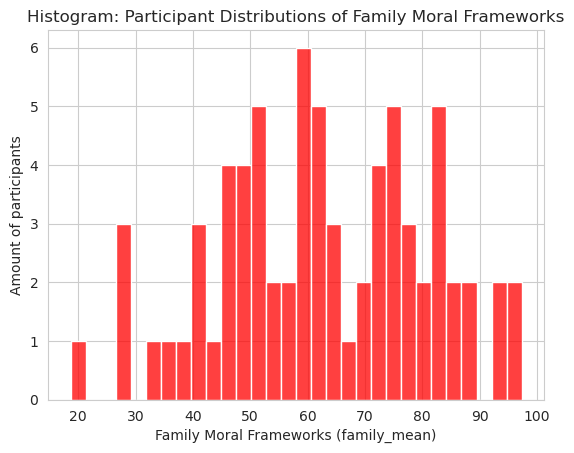

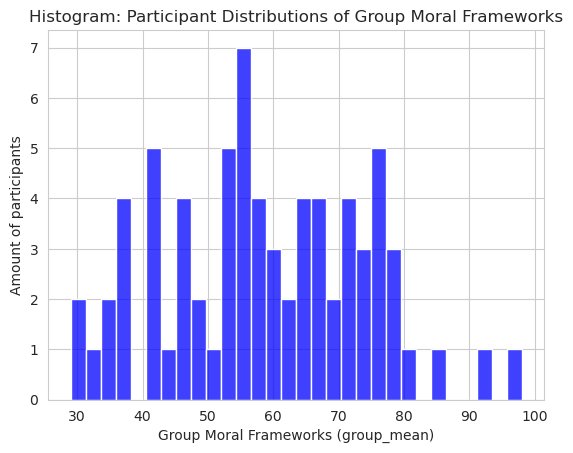

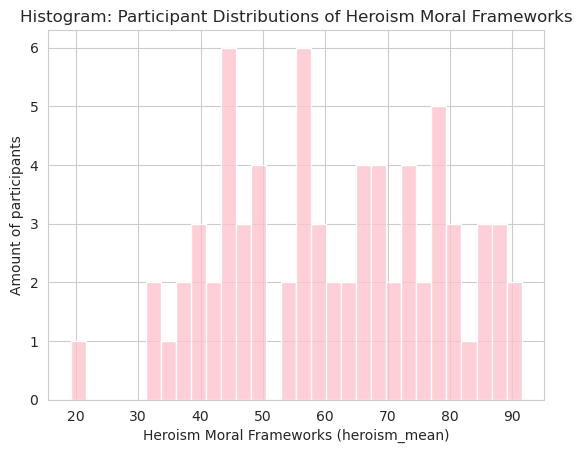

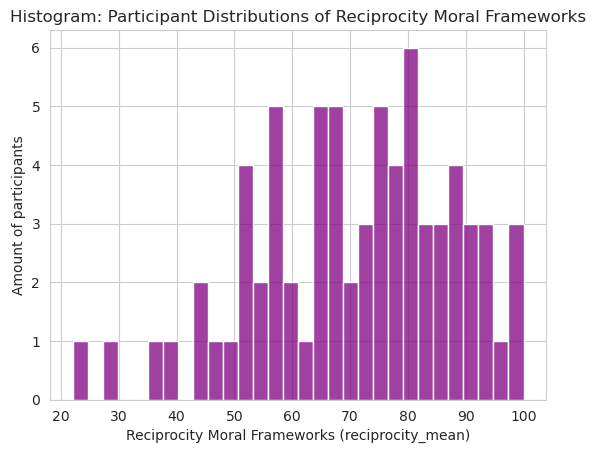

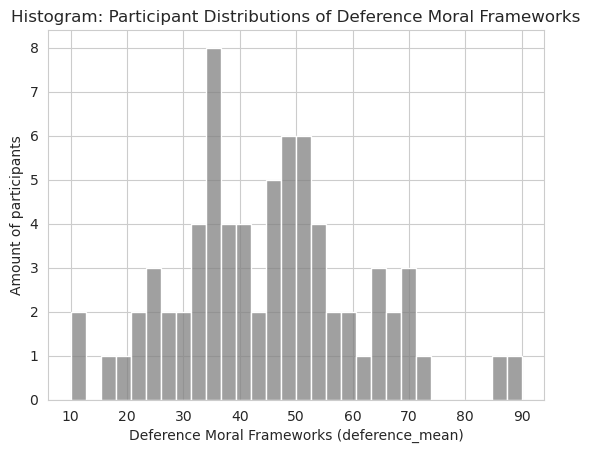

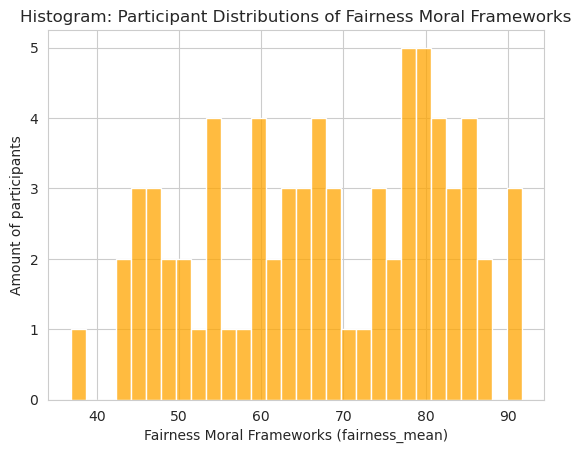

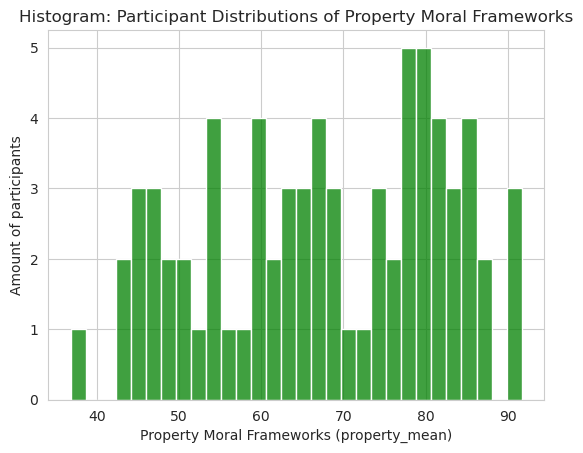

In [28]:
sns.set_palette('pastel')
sns.set_style('whitegrid')

sns.histplot(data=df_morals, x="family_mean", bins=30, color="red")
plt.title('Histogram: Participant Distributions of Family Moral Frameworks')
plt.xlabel('Family Moral Frameworks (family_mean)')
plt.ylabel('Amount of participants')
plt.show()

sns.histplot(data=df_morals, x="group_mean", bins=30, color="blue")
plt.title('Histogram: Participant Distributions of Group Moral Frameworks')
plt.xlabel('Group Moral Frameworks (group_mean)')
plt.ylabel('Amount of participants')
plt.show()

sns.histplot(data=df_morals, x="heroism_mean", bins=30, color="pink")
plt.title('Histogram: Participant Distributions of Heroism Moral Frameworks')
plt.xlabel('Heroism Moral Frameworks (heroism_mean)')
plt.ylabel('Amount of participants')
plt.show()

sns.histplot(data=df_morals, x="reciprocity_mean", bins=30, color="purple")
plt.title('Histogram: Participant Distributions of Reciprocity Moral Frameworks')
plt.xlabel('Reciprocity Moral Frameworks (reciprocity_mean)')
plt.ylabel('Amount of participants')
plt.show()

sns.histplot(data=df_morals, x="deference_mean", bins=30, color="gray")
plt.title('Histogram: Participant Distributions of Deference Moral Frameworks')
plt.xlabel('Deference Moral Frameworks (deference_mean)')
plt.ylabel('Amount of participants')
plt.show()

sns.histplot(data=df_morals, x="fairness_mean", bins=30, color="orange")
plt.title('Histogram: Participant Distributions of Fairness Moral Frameworks')
plt.xlabel('Fairness Moral Frameworks (fairness_mean)')
plt.ylabel('Amount of participants')
plt.show()

sns.histplot(data=df_morals, x="property_mean", bins=30, color="green")
plt.title('Histogram: Participant Distributions of Property Moral Frameworks')
plt.xlabel('Property Moral Frameworks (property_mean)')
plt.ylabel('Amount of participants')
plt.show()

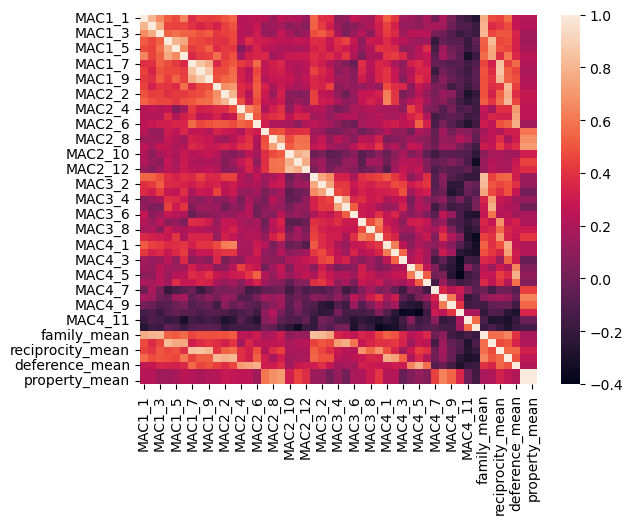

In [24]:
correlation_matrix = df_morals.corr()
sns.heatmap(correlation_matrix)
plt.show()

_________
### Analyzing fMRI responses that could make participants ineligible 
- Using Bag of Words and Vectorizer text analysis
- Seeing participants non-numerical data responses to see why they are ineligible for the fMRI or if further clarification is needed

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [30]:
df_csv1 = df_csv.dropna(subset=['BIC2-2'])

corpus = df_csv1['BIC2-2']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("TF-IDF:")
tfidf

TF-IDF:


,2017,2018,2021,ablation,about,achilles,acl,ago,and,ankle,...,uvula,ve,was,when,wisdom,without,wrist,years,yes,young
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.598689,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.459104,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385790,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.385790,0.000000,0.000000,0.000000,0.0,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.470243,0.000000,0.383180,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.321240,0.000000,0.000000,0.000000,0.0,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.366751,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [31]:
tfidf.describe()

,2017,2018,2021,ablation,about,achilles,acl,ago,and,ankle,...,uvula,ve,was,when,wisdom,without,wrist,years,yes,young
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,...,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,0.012727,0.008092,0.015989,0.032889,0.009898,0.009990,0.055498,0.009898,0.053607,0.020991,...,0.004893,0.017698,0.020169,0.009121,0.086616,0.004893,0.010677,0.009898,0.011628,0.009121
std,0.083457,0.053062,0.104845,0.150672,0.064906,0.065507,0.181545,0.064906,0.125588,0.137648,...,0.032089,0.081082,0.077715,0.059808,0.191655,0.032089,0.070013,0.064906,0.076249,0.059808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.547262,0.347948,0.687516,0.707107,0.425615,0.429555,0.851984,0.425615,0.444581,0.902615,...,0.210419,0.383432,0.366751,0.392189,0.707107,0.210419,0.459104,0.425615,0.500000,0.392189


In [39]:
tfidf.columns.tolist()

['2017',
 '2018',
 '2021',
 'ablation',
 'about',
 'achilles',
 'acl',
 'ago',
 'and',
 'ankle',
 'appendectomy',
 'appendic',
 'appendicitis',
 'arm',
 'around',
 'arthroscopy',
 'as',
 'avulsion',
 'back',
 'be',
 'because',
 'behind',
 'bone',
 'born',
 'both',
 'breast',
 'broken',
 'cancerous',
 'cardiac',
 'closed',
 'collateral',
 'colonoscopy',
 'complete',
 'crohn',
 'cyst',
 'describe',
 'disease',
 'displaced',
 'ear',
 'elbow',
 'endoscopy',
 'epicondyle',
 'extra',
 'fear',
 'femur',
 'for',
 'fracture',
 'from',
 'fusion',
 'gallbladder',
 'gland',
 'graft',
 'growth',
 'had',
 'have',
 'hernia',
 'hip',
 'humerus',
 'if',
 'implant',
 'importid',
 'in',
 'inside',
 'it',
 'june',
 'labrum',
 'lateral',
 'left',
 'ligament',
 'many',
 'medial',
 'meniscus',
 'might',
 'mouth',
 'my',
 'near',
 'of',
 'on',
 'oral',
 'pituitary',
 'please',
 'probably',
 'qid136_text',
 'reconstruction',
 'reduction',
 'removal',
 'removed',
 'removing',
 'repair',
 'rhinoplasty',
 'right'

------
### TFDIF analysis
- BIC2-2 asks if participants have had a prior surgery or operation
- We can see in the TFDIF that participants noted the year (2017, 2018, and 2021) of when they either had an accident or injury that would adjust their fMRI eligibility
- Participants noted where their injury occured (ie; "ankle", "femur", "wrist")
- Participants noted what type of surgery occured (ie; "rhinoplasty", "tumor", "endoscopy")
- "Wisdom Tooth Removal Surgery" and Tonsil Removal/Tonsillectomy were popular responses

In [43]:
df_csv1 = df_csv.dropna(subset=['BIC8-2'])

corpus = df_csv1['BIC8-2']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("Bag of Words:")
bow

Bag of Words:


,accidentally,an,and,answer,arm,back,birth,birthcontrol,cannot,change,...,shoulder,sorry,spinal,teeth,to,type,use,was,wrong,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
bow.describe()

,accidentally,an,and,answer,arm,back,birth,birthcontrol,cannot,change,...,shoulder,sorry,spinal,teeth,to,type,use,was,wrong,yes
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.064516,0.032258,0.064516,0.096774,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,...,0.032258,0.129032,0.032258,0.032258,0.193548,0.032258,0.032258,0.032258,0.032258,0.096774
std,0.249731,0.179605,0.359211,0.538816,0.179605,0.179605,0.179605,0.179605,0.179605,0.179605,...,0.179605,0.340777,0.179605,0.179605,0.401610,0.179605,0.179605,0.179605,0.179605,0.300537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
bow.columns.tolist()

['accidentally',
 'an',
 'and',
 'answer',
 'arm',
 'back',
 'birth',
 'birthcontrol',
 'cannot',
 'change',
 'clicked',
 'control',
 'dont',
 'fusion',
 'go',
 'have',
 'hormonal',
 'if',
 'implant',
 'importid',
 'in',
 'includes',
 'instrumentation',
 'is',
 'iud',
 'meant',
 'metal',
 'mirena',
 'my',
 'nexplanon',
 'no',
 'nuvaring',
 'of',
 'press',
 'put',
 'qid79_text',
 'say',
 'shoulder',
 'sorry',
 'spinal',
 'teeth',
 'to',
 'type',
 'use',
 'was',
 'wrong',
 'yes']

-----
### Bag of Words analysis
- BIC8-2 asks participants if they have an implants, and if so, which type
- Participants sometimes accidentally click "yes" and cannot change their answer, which they account for in this section (ie; "sorry", "wrong", "answer", "clicked", "cannot", "change", "meant", "to", "type", "say", "no", "dont")
- Female participants often note birth control related implants (ie; "IUD", "nexaplon", "nuvaring", "birthcontrol", "birth", "control")